In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sum_data = pd.read_csv('county_model_performance.csv')

In [11]:
sum_data.shape

(18, 4)

In [12]:
sum_data

,countyFIPS,countyName,nObservations,absError
0,48001,Anderson,2079,0.057498
1,48063,Camp,540,0.039266
2,48067,Cass,1791,0.038447
3,48073,Cherokee,2342,0.051451
4,48119,Delta,215,0.070554
5,48159,Franklin,1087,0.035073
6,48203,Harrison,4389,0.079365
7,48213,Henderson,7409,0.492501
8,48223,Hopkins,2584,0.036909
9,48277,Lamar,3183,0.037921


In [56]:
print('Total No of data points used in the model is: ', sum(sum_data.nObservations))

Total No of data points used in the model is:  36377


In [61]:
henderson = sum_data.countyName == 'Henderson'
print(sum_data[henderson].nObservations)

7    7409
Name: nObservations, dtype: int64


In [77]:
print('Percent of data used for the model is: ', (7409/len(data[data.county == 'Henderson'])) *100 )
# Only ~14% of data in Henderson county was used for the model. 
      

Percent of data used for the model is:  13.74072700296736


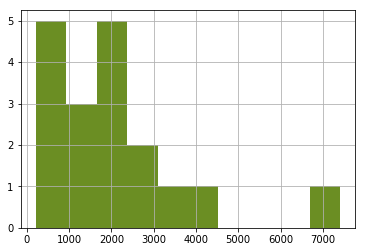

In [17]:
sum_data.nObservations.hist( color = 'olivedrab', )

● countyFIPS​: the unique FIPS identifier for the county <br/>
● countyName​: the name of the county <br/>
● nObservations​: the number of properties used for training the model to estimate ​estimatedValue​ in this county <br/>
● absError​: an absolute percentage error describing our estimate of the performance of the model in this
county. Higher is worse.<br/>

In [14]:
sum_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 4 columns):
countyFIPS       18 non-null int64
countyName       18 non-null object
nObservations    18 non-null int64
absError         18 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 656.0+ bytes


In [21]:
sum_data.describe()

,countyFIPS,nObservations,absError
count,18.000000,18.000000,18.000000
mean,48255.666667,2020.944444,0.084584
std,153.754579,1729.531200,0.118721
min,48001.000000,215.000000,0.021319
25%,48129.000000,813.750000,0.036222
50%,48250.000000,1863.500000,0.038856
75%,48375.500000,2523.500000,0.067290
max,48499.000000,7409.000000,0.492501


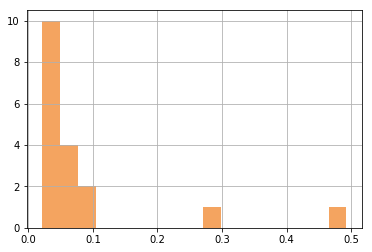

In [34]:
sum_data.absError.hist(bins = 17, color = 'sandybrown')

### Looking into Housing Data

In [78]:
data = pd.read_csv('home_values_texas.csv')

In [79]:
data.head()

,id,address,city,county,countyFIPS,state,zipcode,latitude,longitude,bedrooms,...,yearBuilt,taxYear,taxAssessedValue,taxMarketValue,taxImprovementValue,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimatedValue
0,236813509,111 HILLTOP DR,NAPLES,Morris,48343,TX,75568.0,33.197100,-94.681362,0,...,1962.0,2018,65960.0,65960.0,63810.0,1911-11-11,NaN,NaN,NaN,89724
1,166249408,707 KAY DR,LONGVIEW,Harrison,48203,TX,75601.0,32.506533,-94.684592,0,...,1960.0,2018,140640.0,140640.0,121250.0,1993-01-01,NaN,NaN,NaN,170819
2,215428762,9803 FM 251 S,BIVINS,Cass,48067,TX,75555.0,32.965092,-94.103827,0,...,1999.0,2018,65800.0,65800.0,58270.0,1990-11-14,NaN,NaN,NaN,87347
3,215055126,408 E HINES ST,TALCO,Titus,48449,TX,75487.0,33.362020,-95.099580,0,...,1946.0,2018,27942.0,27942.0,25259.0,NaN,NaN,NaN,NaN,39864
4,235563264,440 W ALABAMA ST,AVERY,Red River,48387,TX,75554.0,33.549630,-94.783930,0,...,1926.0,2018,54369.0,54369.0,52473.0,2008-11-07,NaN,NaN,NaN,64577


In [80]:
data.shape

(234216, 24)

In [81]:
data.state.value_counts()  # ALL data is texas

TX    234216
Name: state, dtype: int64

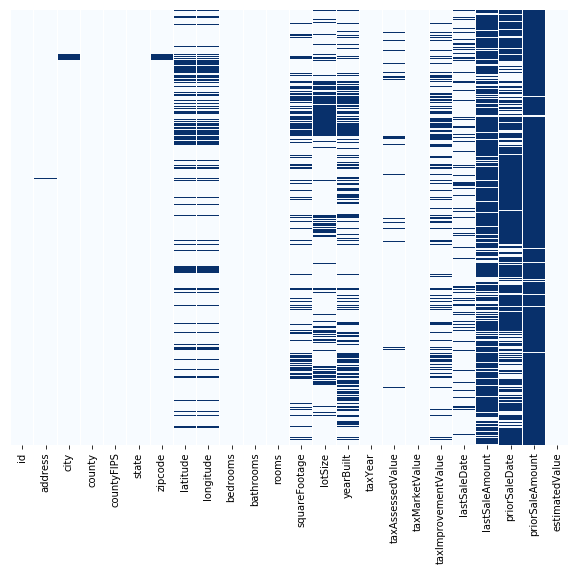

In [82]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [83]:
henderson = data.county == 'Henderson'

In [84]:
data[henderson].head()

,id,address,city,county,countyFIPS,state,zipcode,latitude,longitude,bedrooms,...,yearBuilt,taxYear,taxAssessedValue,taxMarketValue,taxImprovementValue,lastSaleDate,lastSaleAmount,priorSaleDate,priorSaleAmount,estimatedValue
65,167662497,13525 TWIN CREEK LN,MABANK,Henderson,48213,TX,75147.0,32.343720,-96.077490,0,...,1988.0,2018,167750.0,167750.0,160770.0,1989-09-01,NaN,NaN,NaN,213168
137,231326505,216 W ANDREW DR,MABANK,Henderson,48213,TX,75147.0,32.356420,-96.108130,0,...,NaN,2018,69190.0,69190.0,62190.0,2018-02-19,NaN,2003-05-13,NaN,119860
190,167667160,310 W MCAFEE DR,MABANK,Henderson,48213,TX,75147.0,32.355610,-96.110180,0,...,NaN,2018,144700.0,144700.0,137700.0,2015-09-11,NaN,2015-06-11,NaN,187000
208,164989679,213 W ALENE DR,MABANK,Henderson,48213,TX,75147.0,32.356760,-96.107770,0,...,1975.0,2018,64080.0,64080.0,57080.0,2014-01-17,NaN,2009-12-10,NaN,115289
356,231332421,15382 COUNTY ROAD 4014,MABANK,Henderson,48213,TX,75147.0,32.446715,-96.079705,0,...,NaN,2018,2000.0,2000.0,NaN,2004-11-09,NaN,NaN,NaN,65000


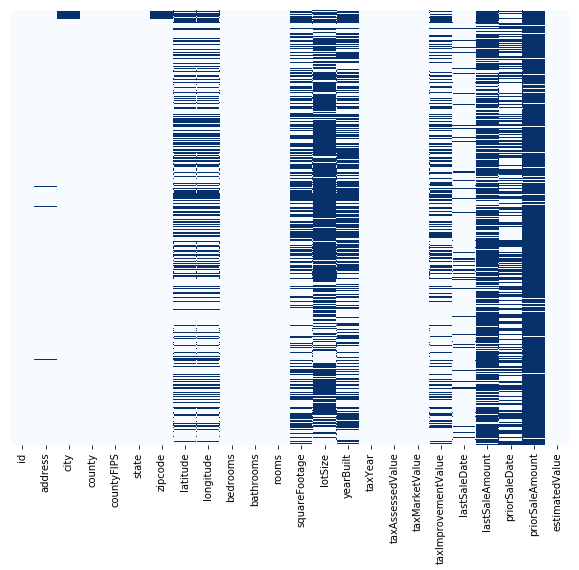

In [85]:
# Lets see what is happening with the missing values with our Henderson county

plt.figure(figsize = (10, 8))
sns.heatmap(data[henderson].isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [86]:
data[henderson].county.value_counts()
# looks like in our training set we only have less records -- did the end up in the training set? I guess so
#let's check the math

Henderson    53920
Name: county, dtype: int64

In [87]:
len(data[henderson])

53920

In [88]:
missing_henderson = 7409 - len(data[henderson])
print('Total discrepancy on No of observations for Henderson County is: ', missing_henderson)

Total discrepancy on No of observations for Henderson County is:  -46511


In [89]:
a = 7409 - 53920
a

-46511

My observations: 
* Why do I see different countyFIPS in data for Henderson county? This could be the reason as the model would treat these values differently. 

In [90]:
48213

48213

In [91]:
data[henderson].county.value_counts()

Henderson    53920
Name: county, dtype: int64

In [92]:
data[henderson].countyFIPS.value_counts()

48213    53920
Name: countyFIPS, dtype: int64

In [93]:
data.columns

Index(['id', 'address', 'city', 'county', 'countyFIPS', 'state', 'zipcode',
       'latitude', 'longitude', 'bedrooms', 'bathrooms', 'rooms',
       'squareFootage', 'lotSize', 'yearBuilt', 'taxYear', 'taxAssessedValue',
       'taxMarketValue', 'taxImprovementValue', 'lastSaleDate',
       'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'estimatedValue'],
      dtype='object')

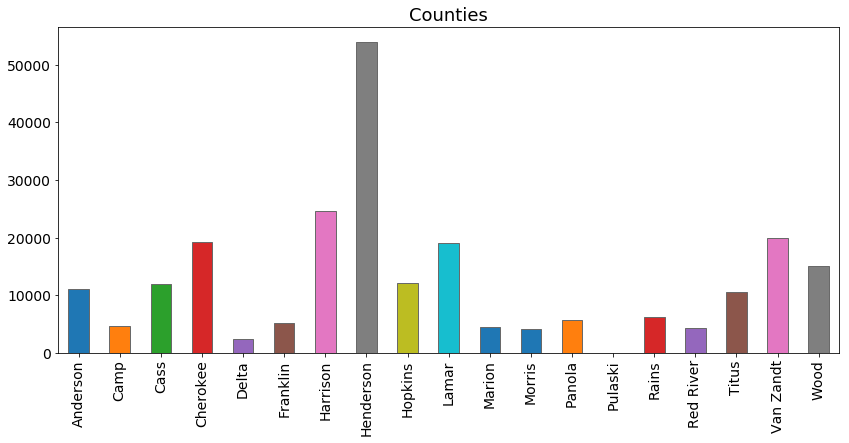

In [94]:
plt.title('Counties', fontsize = 18)

plt.grid(c = 'lemonchiffon', linestyle = '--')
ax = data['county'].value_counts().sort_index().plot.bar(
    figsize = (14,6),
    fontsize = 14, edgecolor='dimgrey')

### Ok, so Henderson is the most represented county in our dataset. Let's see how was it possible that different county FIPS ended up under the same county name. 

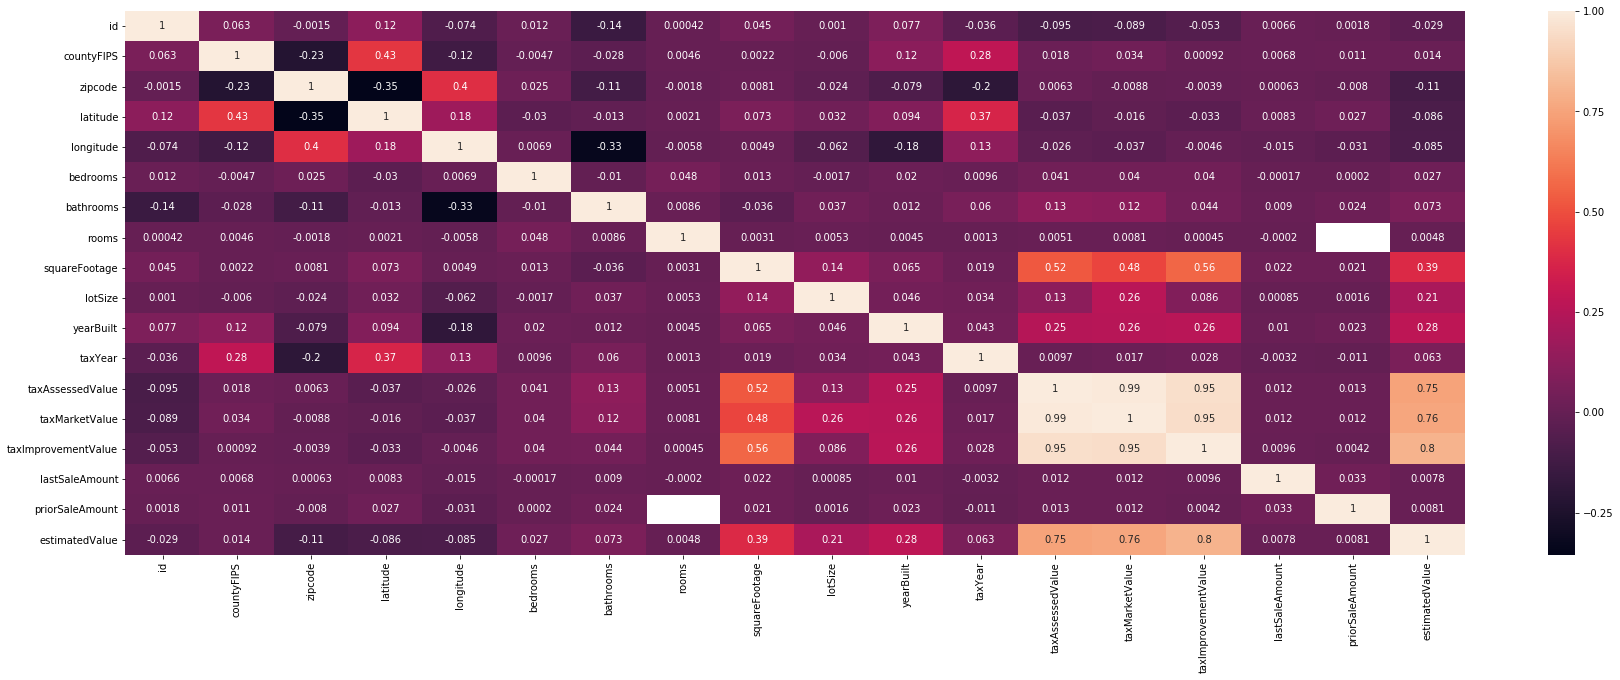

In [95]:
plt.figure(figsize = (30, 10))
sns.heatmap(data.corr(), annot = True)

In [96]:
data.columns

Index(['id', 'address', 'city', 'county', 'countyFIPS', 'state', 'zipcode',
       'latitude', 'longitude', 'bedrooms', 'bathrooms', 'rooms',
       'squareFootage', 'lotSize', 'yearBuilt', 'taxYear', 'taxAssessedValue',
       'taxMarketValue', 'taxImprovementValue', 'lastSaleDate',
       'lastSaleAmount', 'priorSaleDate', 'priorSaleAmount', 'estimatedValue'],
      dtype='object')

From this correlation matrix we can see the best predictors for our model and the highest correlated features with our target: 
* 'taxAssessedValue',  ---> NO MISSING VALUES
* 'taxMarketValue',  -----> No Missing Values
* 'taxImprovementValue'  ----> many missing values --> 22% Missing Values and this is our highest predictor. To impove the model we need to get more data here. 
* Sq Footage ---> Many missing values

No I want to see how are we doing in terms of missing values for these features for Henderson County

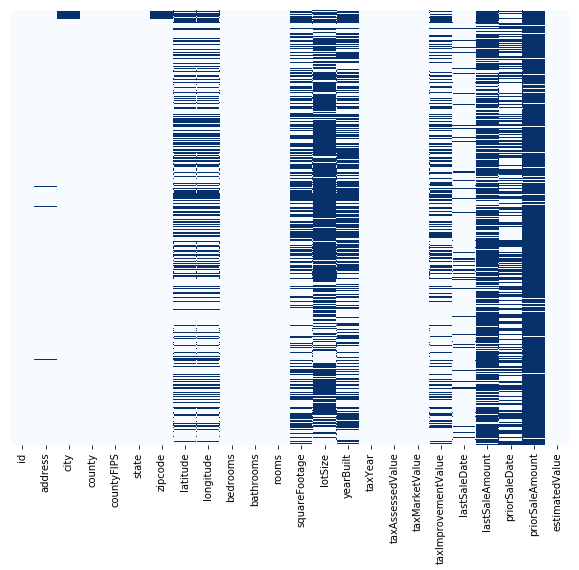

In [97]:
plt.figure(figsize = (10, 8))
sns.heatmap(data[henderson].isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [101]:
missing_values = (sum(data['taxImprovementValue'].isnull())/234216)*100
print('Missing Values percentage for taxImprovementValue is: '), missing_values

Missing Values percentage for taxImprovementValue is: 


(None, 21.595877309833657)

(0, 400000)

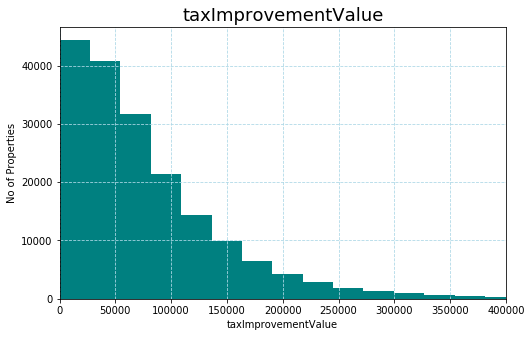

In [102]:
plt.title('taxImprovementValue', fontsize = 18)

plt.xlabel('taxImprovementValue')
plt.ylabel('No of Properties')
data['taxImprovementValue'].hist(bins = 250, figsize = (8,5), color = 'teal')
plt.grid(c = 'lightblue', linestyle = '--')
plt.xlim((0, 400000))

(0, 700000)

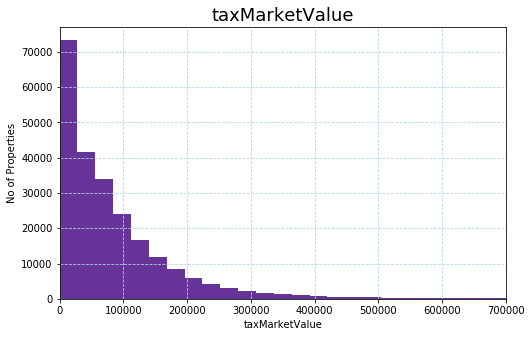

In [108]:
plt.title('taxMarketValue', fontsize = 18)

plt.xlabel('taxMarketValue')
plt.ylabel('No of Properties')
data['taxMarketValue'].hist(bins = 250, figsize = (8,5), color = 'rebeccapurple')
plt.grid(c = 'lightblue', linestyle = '--')
plt.xlim((0, 700000))

In [105]:
data['taxMarketValue'].max()

7002000.0

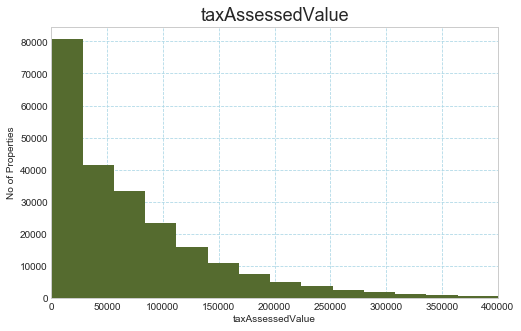

In [112]:
plt.title('taxAssessedValue', fontsize = 18)

plt.xlabel('taxAssessedValue')
plt.ylabel('No of Properties')
data['taxAssessedValue'].hist(bins = 250, figsize = (8,5), color = 'darkolivegreen')

plt.xlim((0, 400000))
plt.grid(c = 'lightblue', linestyle = '--')

In [113]:
### Maybe these two columns are related themselves -- > how do you check on correlation here? 

They select only the features that would contribute most to the quality of the resulting model. This process is called “Feature Selection”.
Let's use Pearson correlation to summarize the strength of the linear relationship between two features.

(nan, 1.0)


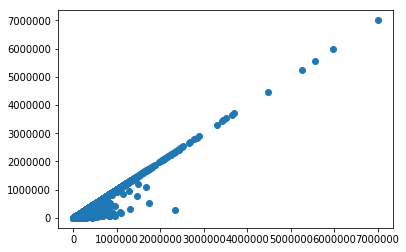

Let's use Pearson correlation to summarize the strength of the linear relationship between two features.

### multicollinearity ----> we have two predictors that are correlated between each other which causes some 

In [114]:
from numpy import cov
covariance = cov(X, Y)
print(covariance)

[[1.28813489e+10 1.14909812e+10]
 [1.14909812e+10 1.18618534e+10]]


In [115]:
sum(X.isnull()), sum(Y.isnull()), len(X), len(Y)

(0, 0, 234216, 234216)

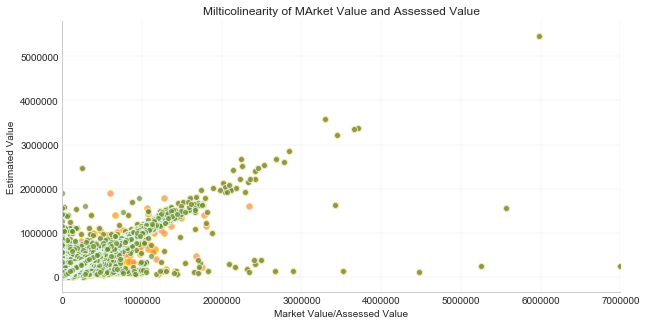

In [116]:
data.taxMarketValue = data.taxMarketValue.fillna(-1)
data.taxAssessedValue = data.taxAssessedValue.fillna(-1)


plt.style.use('seaborn-whitegrid')

X = data.taxMarketValue
Y = data.taxAssessedValue


fig, ax = plt.subplots(figsize=(10, 5))


#assigns a color to each data point
ax.scatter(X, data.estimatedValue, alpha=0.70, color='salmon', edgecolors='gold')
ax.scatter(Y, data.estimatedValue, alpha = 0.7, color = 'olivedrab', edgecolors='azure')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(color='grey', linestyle='-', linewidth=0.15, alpha=0.5)
ax.set_title('Milticolinearity of Market Value and Assessed Value')
ax.set_xlabel('Market Value/Assessed Value')
ax.set_ylabel('Estimated Value')
ax.set_xlim(0,7000000)

plt.show()




In [118]:
from scipy.stats import pearsonr
pearson, _ = pearsonr(X, Y)
print('Pearson Correlation coef between Market Value/ Assessed Value is: '), pearson

Pearson Correlation coef between Market Value/ Assessed Value is: 


(None, 0.9296086692653657)

Correlated features in general don't improve models (although it depends on the specifics of the problem like the number of variables and the degree of correlation), but they affect specific models in different ways and to varying extents:

* For linear models (e.g., linear regression or logistic regression), multicolinearity can yield solutions that are wildly varying and possibly numerically unstable.

* Random forests can be good at detecting interactions between different features, but highly correlated features can mask these interactions.

* More generally, this can be viewed as a special case of Occam's razor. A simpler model is preferable, and, in some sense, a model with fewer features is simpler. The concept of minimum description length makes this more precise.


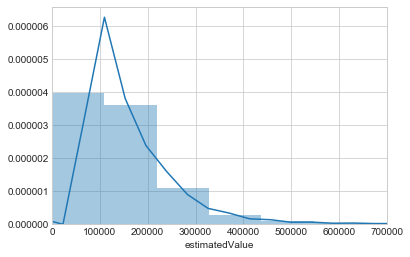

In [123]:
sns.distplot(data.estimatedValue,kde = True)
plt.xlim(0, 700000)
plt.show()

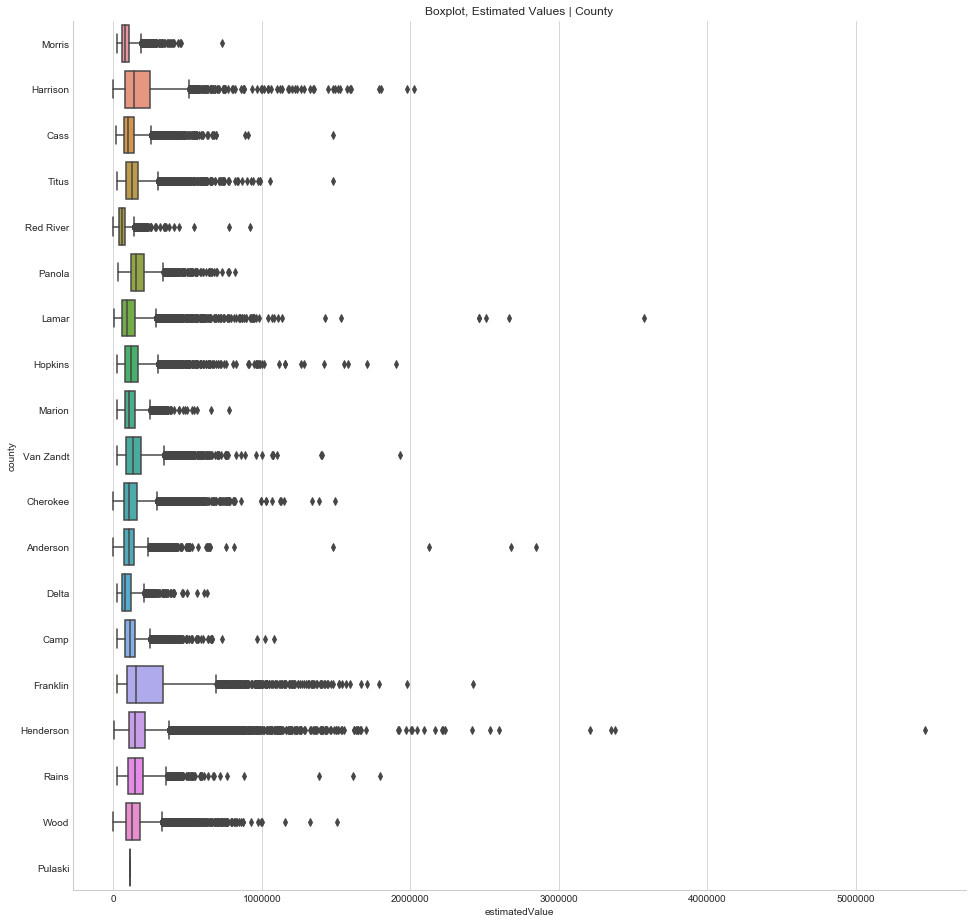

In [127]:
fig, ax = plt.subplots(figsize=[16, 16])
sns.boxplot(
    data=data,
    y=data.county,
    x=data.estimatedValue
)
ax.set_title('Boxplot, Estimated Values | County')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

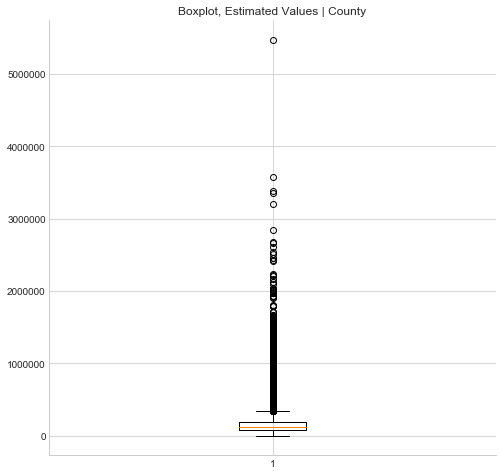

In [136]:
fig, ax = plt.subplots(figsize=[8, 8])
ax.boxplot(data.estimatedValue)
ax.set_title('Boxplot, Estimated Values | County')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [146]:
mean_y = data.estimatedValue.mean()

Axes.axvline(x=0, ymin=0, ymax=1, **kwargs)[source]

(-1, 2)

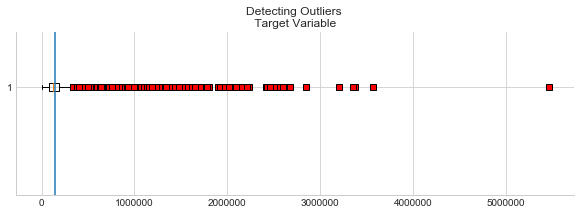

In [151]:
fig, ax1 = plt.subplots(figsize=[10, 5])

ax1.set_title('Boxplot, Estimated Values | County')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

red_square = dict(markerfacecolor='r', marker='s')

ax1.set_title('Detecting Outliers \n Target Variable ')
ax1.boxplot(data.estimatedValue, vert=False, flierprops=red_square)
ax1.axvline(x = mean_y)
plt.ylim(-1, 2)

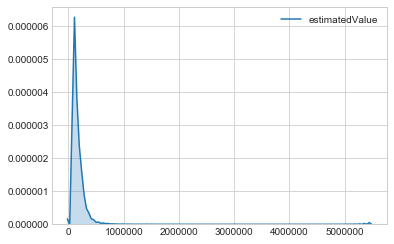

In [143]:
ax = sns.kdeplot(data.estimatedValue,
                  shade=True,shade_lowest=False)